# Findings
OSMO is shift-correlated with BTCUSDT

However, Fees have the potential to wreck the trading strateg

1. If you just take, Fees are too much

2. Market making may potentially work

3. Look into holding positions rather than hacking out due to fees
- how much of the pnl comes from holding when we don't explicitly want to?

In [2]:
""" 
Imports
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('./5min_data.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.head()
print("Daterange:", df.index[0], df.index[-1])

Daterange: 2024-09-01 00:00:00 2024-11-21 19:00:00


In [4]:
# Convert to different time range
df = df.iloc[::2]

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


''

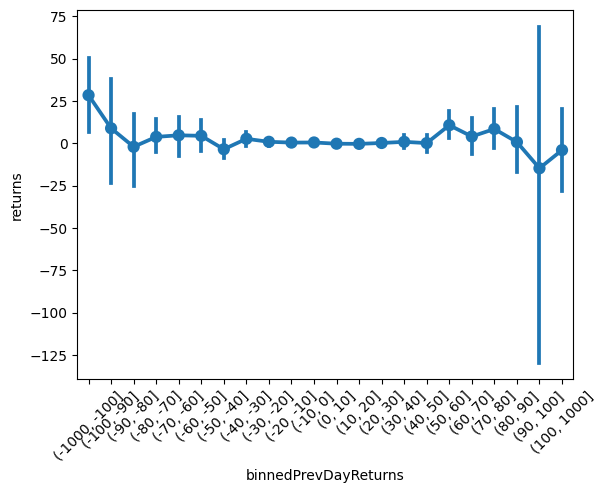

In [5]:
# Bitcoin close
btcDf = pd.DataFrame({'close': df['BTCUSDT_close']})
btcDf['returns'] = (btcDf['close']/btcDf['close'].shift(1)-1)*100*100
btcDf['prevDayReturns'] = btcDf['returns'].shift(1)

bins= [-1000] + list(np.arange(-100, 101, 10)) + [1000]
btcDf['binnedPrevDayReturns'] = pd.cut(btcDf['prevDayReturns'], bins=bins)
sns.pointplot(x='binnedPrevDayReturns', y='returns', data=btcDf, errorbar=('ci', 95))
plt.xticks(rotation=45)
;

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


''

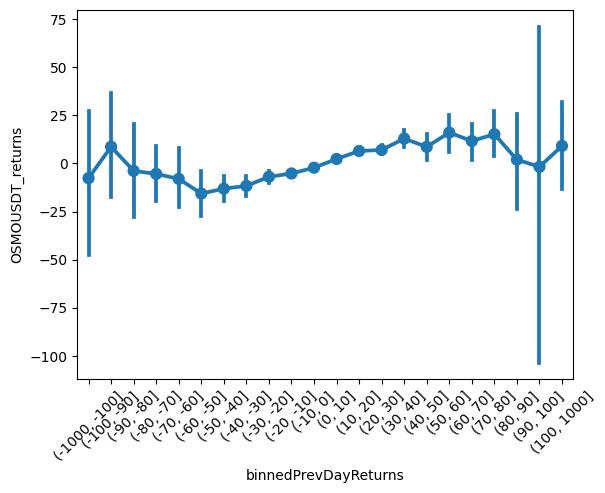

In [6]:
# Check OSMO
btcDf['OSMOUSDT_close'] = df['OSMOUSDT_close']
btcDf['OSMOUSDT_returns'] = (df['OSMOUSDT_close']/df['OSMOUSDT_close'].shift(1)-1) * 100 * 100
sns.pointplot(x='binnedPrevDayReturns', y='OSMOUSDT_returns', data=btcDf, errorbar=('ci', 99))
plt.xticks(rotation=45)
;

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

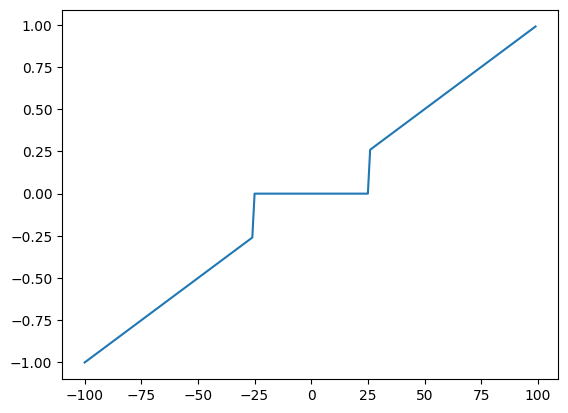

In [7]:
# Utility function
utility = lambda x : np.where((25 < abs(x)), x/100, 0)
x = np.arange(-100,100,1)
y = np.apply_along_axis(func1d=utility, axis=0, arr=x)
sns.lineplot(x, y)

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


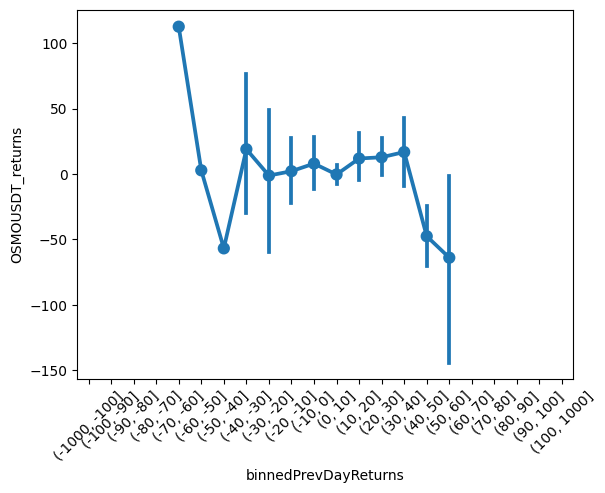

In [8]:
# Visualize a specific day
start_day = datetime(year=2024, month=11, day=21, hour=0)
end_day = datetime(year=2024, month=11, day=21, hour=23, minute=59)
dayData = btcDf.loc[start_day:end_day]

sns.pointplot(x='binnedPrevDayReturns', y='OSMOUSDT_returns', data=dayData, errorbar=('ci', 99));
plt.xticks(rotation=45)
plt.show()

close                     98651.2
returns                 21.475054
prevDayReturns          15.322131
binnedPrevDayReturns     (10, 20]
OSMOUSDT_close             0.5471
OSMOUSDT_returns        -5.480453
OSMOUSDT_position             0.0
Fees                          0.0
cumFees                  0.704224
profit                        NaN
cumProfit                     NaN
profitFees                    NaN
cumProfitFees                 NaN
Name: 2024-11-21 19:00:00, dtype: object

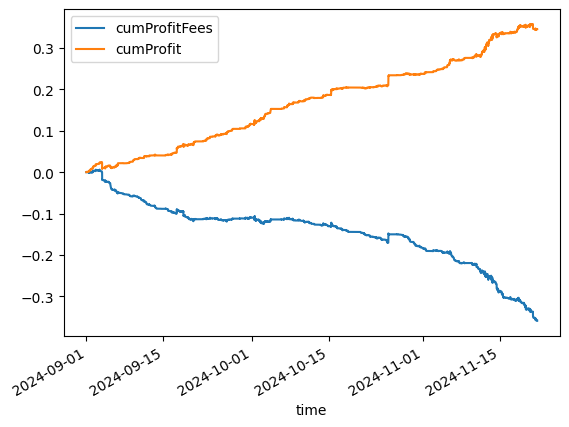

In [ ]:
# Test returns using utility function
btcDf['OSMOUSDT_position'] = np.apply_along_axis(utility, arr=btcDf['returns'], axis=0) # we take position today based on BTC Returns
btcDf['Fees'] = abs((btcDf['OSMOUSDT_position'] - btcDf['OSMOUSDT_position'].shift(1)))*0.00055
btcDf['cumFees'] = btcDf['Fees'].cumsum()

# profit shown in a row --> profit made form our position by holding today until tmrw
btcDf['profit'] = btcDf['OSMOUSDT_position']*(btcDf['OSMOUSDT_close'].shift(-1)-btcDf['OSMOUSDT_close'])
btcDf['cumProfit'] = btcDf['profit'].cumsum()

btcDf['profitFees'] = btcDf['profit'] - btcDf['Fees']
btcDf['cumProfitFees'] = btcDf['profitFees'].cumsum()

btcDf[['cumProfitFees', 'cumProfit']].plot()
# day = datetime(2024, 11, 18, 0)
# end_day = day + timedelta(hours=23, minutes=59)
# btcDf[['cumProfit']].loc[day:end_day].plot()